In [145]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cv2
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from PIL import Image

In [125]:
df_original = pd.read_csv('C:/Users/Богдан/Downloads/train_40k.csv', encoding='latin-1')
df_original['length'] = df_original['Text'].apply(len)
df_original

,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,length
0,B000E46LYG,Golden Valley Natural Buffalo Jerky,A3MQDNGHDJU4MK,0/0,3.0,-1,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky,130
1,B000GRA6N8,Westing Game,unknown,0/0,5.0,860630400,This was a great book!!!! It is well thought t...,toys games,games,unknown,249
2,B000GRA6N8,Westing Game,unknown,0/0,5.0,883008000,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown,505
3,B000GRA6N8,Westing Game,unknown,0/0,5.0,897696000,I got the book at my bookfair at school lookin...,toys games,games,unknown,504
4,B00000DMDQ,I SPY A is For Jigsaw Puzzle 63pc,unknown,2/4,5.0,911865600,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles,581
...,...,...,...,...,...,...,...,...,...,...,...
39995,B0006IYND6,Japonesque Silver Lipstick Palette Kit 1 piece,A1WKFQYYRJ95F6,0/0,3.0,1344211200,Even when it is very convenient I find it real...,beauty,makeup,lips,160
39996,B000A33FZY,"Truform 20-30 Below Knee Closed-Toe, Beige, Small",A1OMZID10X2JY4,0/0,5.0,1344211200,Wore these the next day after eating Chinese t...,health personal care,medical supplies equipment,braces,139
39997,B000I7D2L4,Zadro Z300 Wall Mountable Fog Free Mirror,A3I8EYB4CKPQVO,0/0,3.0,1344211200,"this is an OK product. Doesn't really stay ""fo...",beauty,tools accessories,mirrors,106
39998,B000KHKKB2,Opalescent Glitter Lotion - 6.3 oz - Liquid,A3GTQQ5ZFCFBBL,0/0,4.0,1344211200,"This ""Glitter-Up"" body lotion offers tremendou...",beauty,skin care,body,469


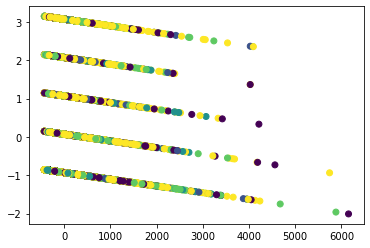

In [126]:
columns = ['Score', 'length']
df_r = shuffle(df_original[columns])
df_rr = df_original.Score.tolist()
pca = PCA(n_components=2)
pca.fit(df_r)
X = pca.transform(df_r)
plt.scatter(X[:,0], X[:,1], c = dr_rr)
plt.show()

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, dr_rr, test_size=0.25)

rfc = RandomForestClassifier(criterion = 'gini', max_depth=10, n_estimators=50 )
rfc.fit(X_train, Y_train)
preds = rfc.predict(X_test)

print('Report:\n',classification_report(Y_test, preds))
print('Confusion Matrix: \n',confusion_matrix(Y_test, preds))

Report:
               precision    recall  f1-score   support

         1.0       0.14      0.00      0.00      1025
         2.0       0.00      0.00      0.00       598
         3.0       0.00      0.00      0.00       798
         4.0       0.10      0.00      0.00      1693
         5.0       0.59      1.00      0.74      5886

    accuracy                           0.59     10000
   macro avg       0.17      0.20      0.15     10000
weighted avg       0.38      0.59      0.44     10000

Confusion Matrix: 
 [[   1    0    0    0 1024]
 [   0    0    0    0  598]
 [   0    0    0    0  798]
 [   1    0    1    1 1690]
 [   5    0    4    9 5868]]


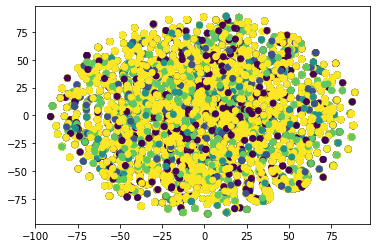

In [128]:
tsne = TSNE(n_components=2)
X = tsne.fit_transform(df_r)
df_rr = df_original.Score.tolist()
plt.scatter(X[:,0], X[:,1], c=df_rr)
plt.show()

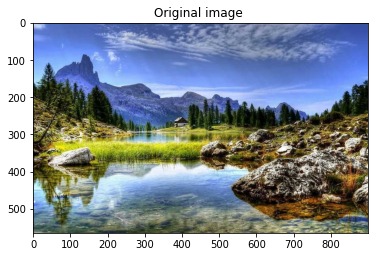

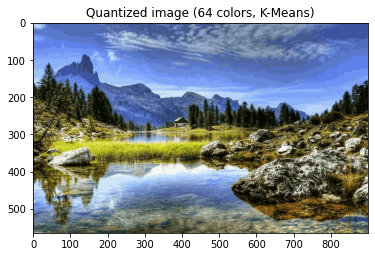

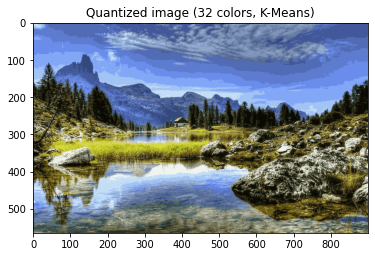

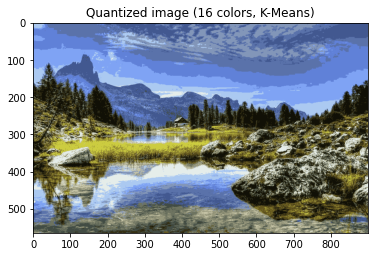

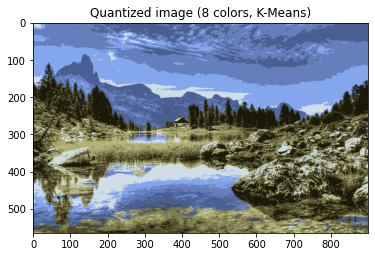

In [129]:
image = Image.open("C:/Users/Богдан/Downloads/image laba 3.jpeg")
color = (64, 32, 16, 8)
image = np.asarray(image)/255
plt.title("Original image ")
plt.imshow(image)
plt.show()
a, b, c  = image.shape
image_array = np.reshape(image, (a * b, c))
image_array_sample = shuffle(image_array, random_state=42, n_samples=20000)

def image(codebook, labels, a, b):
    return codebook[labels].reshape(a, b, -1)

for colors in color:
    kmeans = KMeans(n_clusters=colors, random_state=42).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.title(f"Quantized image ({colors} colors, K-Means)")
    plt.imshow(image(kmeans.cluster_centers_, labels, a, b))
    plt.show()



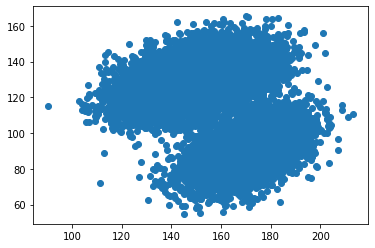

means
 [[149.95866598 129.84874915]
 [169.88746868  89.88815502]] 

cov
 [[[182.80477221  56.2465996 ]
  [ 56.2465996   94.63401869]]

 [[131.78471392  56.77036173]
  [ 56.77036173 104.67429411]]] 

weights
 [0.69290813 0.30709187]


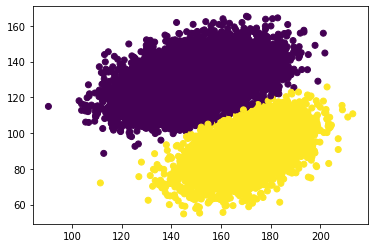

In [130]:
m1 = np.array([150,130], dtype=np.float64)
m2 = np.array([170,90], dtype=np.float64)
c1 = np.array([[140, 10], [130, 110]], dtype=np.float64)
c2 = np.array([[100, 10], [110, 120]], dtype=np.float64)
X_1= np.random.multivariate_normal(m1, c1, (120, 120))
X_2= np.random.multivariate_normal(m2, c2, (80, 80))
X_1 = np.reshape(X_1, (120 * 120, 2))
X_2 = np.reshape(X_2, (80 * 80, 2))
f = np.vstack([X_1, X_2])
f_s = shuffle(f, random_state=42)
plt.scatter(f_s[:,0], f_s[:,1])
plt.show()

gauss = GaussianMixture(n_components=2, random_state=0, tol=0.00001, covariance_type='full')
gauss.fit(f_s)
print(f'means\n {gauss.means_} \n')
print(f'cov\n {gauss.covariances_} \n')
print(f'weights\n {gauss.weights_}')

res = gauss.predict(f_s) 
plt.scatter(f_s[:,0], f_s[:,1], c=res)
plt.show()

In [131]:
## Classification

In [132]:
columns = ['Text', 'Cat1']
df = shuffle(df_original[columns])
df = df.iloc[:2000]
df.index = pd.RangeIndex(0, 2000)

In [133]:
df.Cat1.value_counts()
df_1=df.Text
dff=df
df_1

0       i purchased this pump before my son was born (...
1       I never thought I would ever write a review fo...
2       Our Dog loves this, he gets to see where we ar...
3       I received the tree today, and when i got it o...
4       Love these as they are almost like having dess...
                              ...                        
1995    + We purchaed this for our daughter instead of...
1996    This has become one of our favorite, often pla...
1997    I really wanted this to be my "signature scent...
1998    I have been trained in car seat checks. I stro...
1999    This mirrors are large and clear. The compact ...
Name: Text, Length: 2000, dtype: object

In [134]:
df_2 = df_1.str.replace(r'[^\w\d\s]', ' ')
df_2 = df_2.str.replace(r'\s+', ' ')
df_2 = df_2.str.replace(r'^\s+|\s*?$', ' ')
df_2 = df_2.str.replace(r'\d+(\.\d+)?', 'number')
df_2 = df_2.str.lower()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_2 = df_2.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
import nltk
ps = nltk.PorterStemmer()
df_2 = df_2.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
from nltk.tokenize import word_tokenize
nltk.download('punkt')
all_words = []
for df_1 in df_2:
    words = word_tokenize(df_1)
    for w in words:
        all_words.append(w)
       
all_words = nltk.FreqDist(all_words) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Богдан\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Богдан\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [135]:
df_5 = df
#df_5['Class'] = df['Cat1']
#df_5['Class'] = df.Class.astype("category").cat.codes
df_5['Text'] = df_2
df_5['Cat1'] = df_5.Cat1.astype("category").cat.codes
df_5

,Text,Cat1
0,purchas pump son born eight month ago want get...,0
1,never thought would ever write review lotion s...,1
2,dog love get see go tire fall peac asleep plea...,4
3,receiv tree today got packag small bug crawl a...,2
4,love almost like dessert eaten time,2
...,...,...
1995,purcha daughter instead swing arriv great abl ...,0
1996,becom one favorit often play famili game like ...,5
1997,realli want signatur scent gone hour oh well s...,1
1998,train car seat check strongli recommend produc...,0


len first: 313
len second: 183


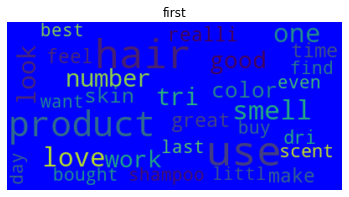

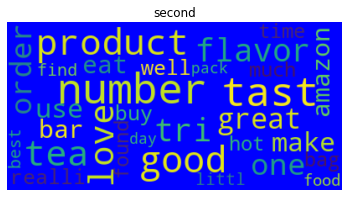

In [136]:
first_list = df_5[df.Cat1==1].explode('Text').Text
second_list = df_5[df.Cat1==2].explode('Text').Text
sum_list = df_5[(df.Cat1==1) | (df.Cat1==2)].explode('Text').Text
print(f'len first: {len(first_list)}\nlen second: {len(second_list)}')

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="blue").generate(' '.join([str(elem) for elem in first_list]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"first")
plt.axis("off")
plt.show()

wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="blue").generate(' '.join([str(elem) for elem in second_list]))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"second")
plt.axis("off")
plt.show()

In [137]:
first_list_words=[]
second_list_words=[]
for df_f in first_list:
    words = word_tokenize(df_f)
    for w in words:
        first_list_words.append(w)
       
first_list_words = nltk.FreqDist(first_list_words)
for df_ff in second_list:
    words = word_tokenize(df_ff)
    for w in words:
        second_list_words.append(w)
       
second_list_words = nltk.FreqDist(second_list_words)

print('10 most common words first: {}'.format(first_list_words.most_common(10)))
print('10 most common words second: {}'.format(second_list_words.most_common(10)))
df_2

10 most common words first: [('use', 244), ('hair', 234), ('number', 194), ('product', 185), ('like', 151), ('smell', 94), ('love', 93), ('one', 88), ('get', 83), ('work', 83)]
10 most common words second: [('number', 133), ('like', 83), ('tast', 81), ('good', 66), ('product', 62), ('tea', 62), ('love', 56), ('flavor', 49), ('tri', 49), ('one', 45)]


0       purchas pump son born eight month ago want get...
1       never thought would ever write review lotion s...
2       dog love get see go tire fall peac asleep plea...
3       receiv tree today got packag small bug crawl a...
4                     love almost like dessert eaten time
                              ...                        
1995    purcha daughter instead swing arriv great abl ...
1996    becom one favorit often play famili game like ...
1997    realli want signatur scent gone hour oh well s...
1998    train car seat check strongli recommend produc...
1999    mirror larg clear compact littl cheap look min...
Name: Text, Length: 2000, dtype: object

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
Cat1 = df['Cat1']
tfidf_model=TfidfVectorizer()
tfidf_vec=tfidf_model.fit_transform(df_2)
tfidf_data=pd.DataFrame(tfidf_vec.toarray())
df_6 = tfidf_data
#df_6
#sum_list
sum_list = tfidf_model.get_feature_names()
sum_list

['_very_',
 'aa',
 'aacut',
 'abandon',
 'abc',
 'abdomen',
 'abdomin',
 'abeno',
 'abil',
 'abl',
 'abod',
 'abolut',
 'abou',
 'abr',
 'abras',
 'absent',
 'absolt',
 'absolut',
 'absolutey',
 'absolutley',
 'absolutli',
 'absorb',
 'absorpt',
 'absoulut',
 'absurdli',
 'abt',
 'abund',
 'abus',
 'ac',
 'accent',
 'accept',
 'accesori',
 'access',
 'accessori',
 'accid',
 'accident',
 'accomod',
 'accompani',
 'accomplish',
 'accompolish',
 'accord',
 'accordingli',
 'accordion',
 'account',
 'acctual',
 'accur',
 'accuraci',
 'accustom',
 'ace',
 'acesulfam',
 'ach',
 'achiev',
 'achil',
 'acia',
 'acid',
 'acn',
 'acp',
 'acqua',
 'acquarella',
 'acquir',
 'acrid',
 'across',
 'act',
 'action',
 'activ',
 'actor',
 'actual',
 'actuali',
 'acual',
 'acur',
 'ad',
 'adapt',
 'adaptogen',
 'adaptor',
 'add',
 'adderal',
 'adderrlin',
 'addict',
 'addit',
 'address',
 'adequ',
 'adher',
 'adhes',
 'adio',
 'adit',
 'adjust',
 'administ',
 'admir',
 'admit',
 'admittedli',
 'adolesc',
 

1600
400
F1 Score : 0.7247767770676972
Report:
               precision    recall  f1-score   support

           0    0.66176   0.75000   0.70313        60
           1    0.77966   0.67647   0.72441        68
           2    0.76000   0.65517   0.70370        29
           3    0.62609   0.73469   0.67606        98
           4    0.82500   0.60000   0.69474        55
           5    0.80645   0.83333   0.81967        90

    accuracy                        0.72500       400
   macro avg    0.74316   0.70828   0.72028       400
weighted avg    0.73519   0.72500   0.72522       400

Confusion Matrix: 
 [[45  1  0  5  0  9]
 [ 4 46  1 15  1  1]
 [ 1  1 19  6  0  2]
 [ 7  8  5 72  2  4]
 [ 7  2  0 11 33  2]
 [ 4  1  0  6  4 75]]


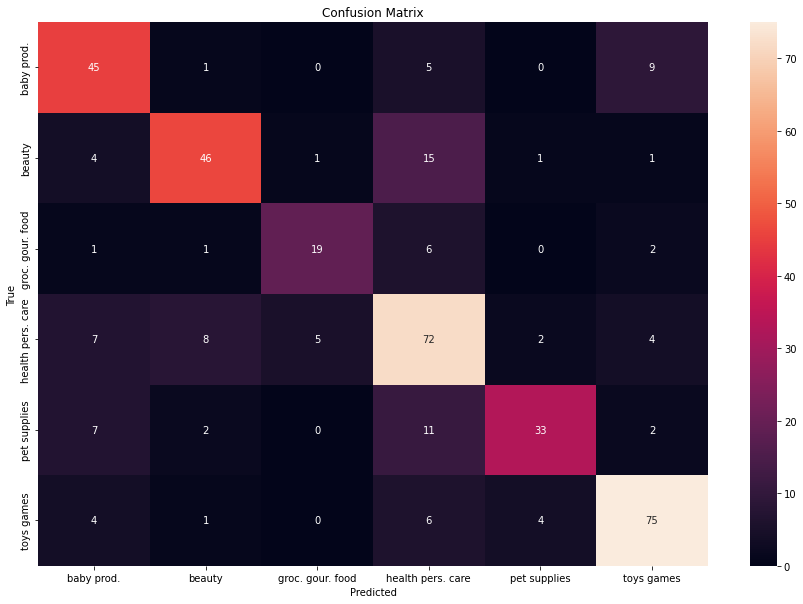

In [140]:
from sklearn import naive_bayes
X = df_6
Y = Cat1
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)
print(len(X_train))
print(len(X_test))
alpha = 0.01
bayes = naive_bayes.MultinomialNB(alpha=alpha)
bayes.fit(X_train, y_train)
y_pred_bayes = bayes.predict(X_test)
print("F1 Score :",f1_score(y_pred_bayes,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred_bayes, digits=5))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_pred_bayes))
plt.figure(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_bayes), annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']),
            yticklabels=(['baby prod.','beauty','groc. gour. food','health pers. care','pet supplies','toys games']))

In [152]:
def find_topics(model, n_top_words, sum_list):
    for topic_idx, topic in enumerate(lda.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1] #get idxs in sorted list asc, get last n items
        top_features = [sum_list[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        print(list(map(lambda x, y: (x,y), top_features, weights)), '\n')

first_list_train_df = df_5[df_5['Cat1']==1]['Text']
second_list_train_df = df_5[df_5['Cat1']==2]['Text']
first_list_train = tfidf_model.fit_transform(first_list_train_df).toarray()
second_list_train = tfidf_model.fit_transform(second_list_train_df).toarray()

lda = LatentDirichletAllocation(n_components=5, random_state=0)

lda.fit(first_list_train)
first_list_lda_transformed = lda.transform(first_list_train)
print(f"first_list topics: ")
find_topics(lda, 10, sum_list)

lda.fit(second_list_train)
second_list_lda_transformed = lda.transform(second_list_train)

print(f'\second_list topics: ')
find_topics(lda, 10, sum_list)

first_list topics: 
[('callous', 4.71478354839632), ('cichlid', 3.036351626844461), ('ergo', 3.0188008830937725), ('dissatisfi', 2.738089794240475), ('cutesi', 2.297419294079583), ('athena', 2.269151406773763), ('climat', 2.154392328797794), ('exodia', 1.9824512809790644), ('appeas', 1.7909061579720198), ('eyeshadow', 1.7774406776933998)] 

[('callous', 2.8513730661850025), ('consult', 2.5879520001417977), ('cutesi', 2.420856381104094), ('ergo', 2.394678053891643), ('climat', 2.221527724206293), ('dislik', 1.9606030371990397), ('exchang', 1.8928851121084853), ('cichlid', 1.8579133817259834), ('crank', 1.7501743049752816), ('athena', 1.5799478135780827)] 

[('cutesi', 3.488547440203627), ('burton', 2.129195226382), ('dislik', 1.9978977833863434), ('climat', 1.8979521864322138), ('anxious', 1.7324975148954713), ('clueless', 1.6696959125802076), ('ergo', 1.65987426352557), ('athena', 1.6166991465332439), ('eyeshadow', 1.5592521901719212), ('damag', 1.55079201153634)] 

[('climat', 3.77271